# **IN this version we are adding our primary dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
!pip install -U bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171048 sha256=7bf7020fd1f1638ffedf855cb406142ac51f77daebc0fb1196012f0884053b0e
  Stored in directory: /root/.cache/pip/wheels/fa/7a/e9/22dd0515e1bad255e51663ee513a2fa839c95934c5fc301090
  Created wheel for gensim: filename=gensim-4.0.1-cp39-cp39-linux_x86_64.whl size=26057807 sha256=e15b13bac98ba5ae88270959f42c500977fe069674dbd765626cbcf6f3e9b25f


In [3]:
!pip install bltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 24.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432537 sha256=b84543676f78e577fe4d0f034cb90d8abd9394cfd3f91fba73d6d6ebf9def5ce
  Stored in directory: /root/.cache/pip/wheels/40/95/27/80bfbeb60364f00de71ea3570cb9b76ab17c8e8ab944c2d81b
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=0a1a11e405784f6515d3b1d1fe8203e7b3119c4c831a21e6022394b2366d507d
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built bltk sklearn


In [4]:
import gensim

/usr/local/lib/python3.9/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
  
import pprint
import tensorflow.compat.v1 as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
tf.disable_eager_execution()

In [6]:
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from bnlp.corpus import stopwords, punctuations, letters, digits

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
import seaborn as sns

In [97]:
fake = pd.read_csv('/content/drive/MyDrive/Thesis and Research/dataFiles/LabeledFake-1K.csv', encoding = "UTF-8")
real = pd.read_csv('/content/drive/MyDrive/Thesis and Research/dataFiles/LabeledAuthentic-7K.csv', encoding = "UTF-8")
primary = pd.read_csv('/content/drive/MyDrive/Thesis and Research/dataFiles/Fake news primary dataset.csv', encoding = "UTF-8")

In [98]:
real = real.sample(2700)

In [99]:
fake.head(5)

,articleID,domain,date,category,source,relation,headline,content,label,F-type
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,Reporter,Unrelated,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,Satire
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,Reporter,Unrelated,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,Satire
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,Reporter,Unrelated,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,Satire
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,Reporter,Unrelated,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,Satire
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,Reporter,Unrelated,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,Satire


In [100]:
real.head(5)

,articleID,domain,date,category,source,relation,headline,content,label
1388,1421,prothomalo.com,2018-09-22 13:01:43,National,reporter,Related,ঢাকার যানজটের সমাধান বাস,• ২২ সেপ্টেম্বর বিশ্ব ব্যক্তিগত গাড়িমুক্ত দিবস...,1.0
5684,6364,kalerkantho.com,2018-09-20 08:49:41,International,ব্রাহ্মণপাড়া থানার ভারপ্রাপ্ত কর্মকর্তা (ওসি),Related,কুমিল্লার ব্রাহ্মণপাড়ায় বাঁশের মাচা থেকে লাশ উ...,কুমিল্লার ব্রাহ্মণপাড়ায় বুধবার সকালে উপজেলার শ...,1.0
1144,1167,ittefaq.com.bd,2018-09-21 10:50:07,International,reporter,Related,"তানজানিয়ায় ফেরি ডুবে মৃত ৪০, উদ্ধারকাজ স্থগিত",তানজানিয়ায় যাত্রীবাহী ফেরি ডুবে অন্তত ৪০ জন মা...,1.0
2333,2445,channelionline.com,2018-09-19 23:26:47,Sports,reporter,Related,ধুঁকে ধুঁকে দেড়শ পেরোল পাকিস্তান,এশিয়া কাপের হাইভোল্টেজ ম্যাচে ভারতকে ১৬৩ রানের...,1.0
7159,8213,jagonews24.com,2018-09-22 15:24:27,National,সিদ্ধিরগঞ্জ থানার পরিদর্শক (তদন্ত),Related,আদমজী ইপিজেডের পোশাক শ্রমিকদের সড়ক অবরোধ,নারায়ণগঞ্জের সিদ্ধিরগঞ্জে আদমজী ইপিজেডের রফতান...,1.0


In [101]:
primary.head(5)

,Domain,headline,category,Content
0,https://web.archive.org/web/20190704042344/htt...,টিটুর পাছায় ফোঁড়া হয়েছে ! সবার দোয়াপ্রার্থী,Miscellaneous,ল্টানো তানপুরার মত একটি অঙ্গ। অত্যন্ত তুচ্ছতাচ...
1,https://web.archive.org/web/20190706174747/htt...,পাঁচ মাস বগলের লোম না কাটায় বউ চলে গেলো যশোরে...,Miscellaneous,নেক আয়োজন করে বিয়ে করে বাসর ঘরে আনন্দ উল্লাস...
2,https://web.archive.org/web/20190709155348/htt...,সবার আগে চাঁদ দেখতে পেয়েছে যশোরের আরাফাত,Miscellaneous,ন্ধ্যার পর চাঁদ দেখা কমিটি থেকে জানানো হয়েছিলো...
3,https://web.archive.org/web/20190708084046/htt...,নোয়াখালীতে চ‍াঁদ দেখা গেছে মোট তিনটা !,Miscellaneous,রাদেশে কোথাও চাঁদ দেখা না গেলেও নোয়াখালীর আবু ...
4,https://web.archive.org/web/20190621125742/htt...,বৃষ্টিতে সিগারেট ভিজে যাওয়ায় অঝোরে কাঁদছে পথ...,Miscellaneous,রের আলো না ফুটতেই অগ্নিগর্ভ রাজধানীতে নেমে এসে...


In [102]:
real.describe()

,articleID,label
count,2700.000000,2700.0
mean,3919.626667,1.0
std,2393.149246,0.0
min,1.000000,1.0
25%,1810.750000,1.0
50%,3805.500000,1.0
75%,5902.000000,1.0
max,8261.000000,1.0


In [103]:
fake.describe()

,articleID,label
count,1299.000000,1299.0
mean,653.268668,0.0
std,377.105082,0.0
min,1.000000,0.0
25%,326.500000,0.0
50%,653.000000,0.0
75%,978.500000,0.0
max,1307.000000,0.0


In [104]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   articleID  1299 non-null   int64 
 1   domain     1299 non-null   object
 2   date       1299 non-null   object
 3   category   1299 non-null   object
 4   source     1299 non-null   object
 5   relation   1299 non-null   object
 6   headline   1299 non-null   object
 7   content    1299 non-null   object
 8   label      1299 non-null   int64 
 9   F-type     1299 non-null   object
dtypes: int64(2), object(8)
memory usage: 101.6+ KB


In [105]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Domain    1357 non-null   object
 1   headline  1357 non-null   object
 2   category  1354 non-null   object
 3   Content   1357 non-null   object
dtypes: object(4)
memory usage: 42.5+ KB


In [106]:
np.where(pd.isnull(primary))

(array([ 51, 166, 435]), array([2, 2, 2]))

In [107]:
primary.dropna(inplace = True)

In [108]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 0 to 1356
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Domain    1354 non-null   object
 1   headline  1354 non-null   object
 2   category  1354 non-null   object
 3   Content   1354 non-null   object
dtypes: object(4)
memory usage: 52.9+ KB


In [109]:
primary.rename(columns={'Domain':'domain','Content':'content'}, inplace= True)

In [110]:
primary = primary.replace({'miscellaneous': 'Miscellaneous', 'crime': 'Crime', 'international': 'International', 'national':'National', 'sports':'Sports','lifestyle':'Lifestyle', 'Editorial':'Miscellaneous', 'politics':'Politics'})

In [111]:
primary['category'].value_counts()

Miscellaneous    438
Politics         336
National         154
Entertainment    117
International     84
Crime             66
Sports            64
Lifestyle         46
Education         25
Technology        18
Finance            6
Name: category, dtype: int64

<Axes: xlabel='category', ylabel='count'>

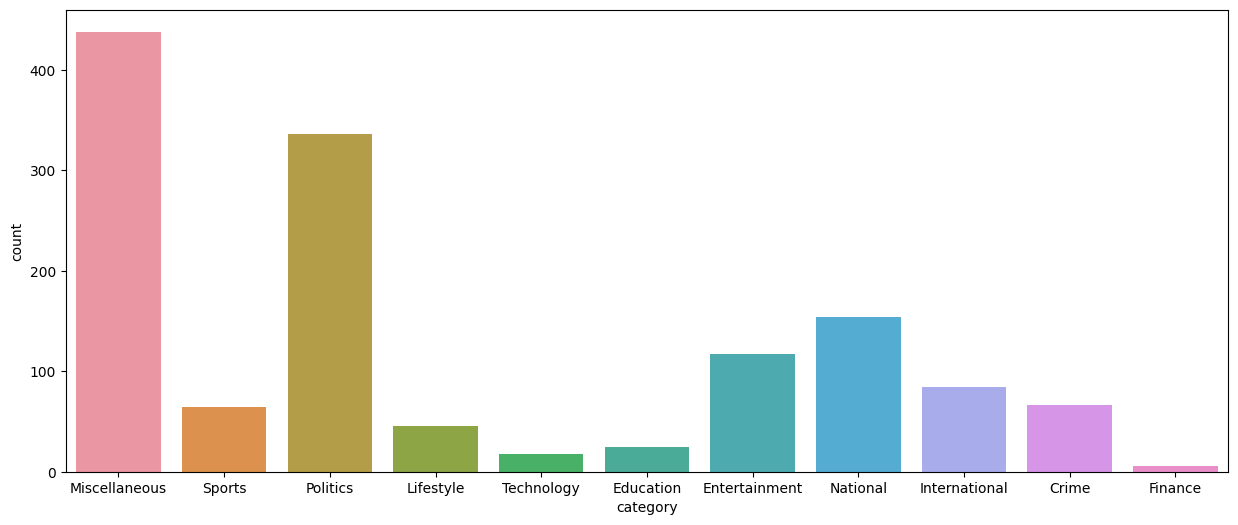

In [112]:
plt.figure (figsize=(15, 6))
sns.countplot(x = 'category', data=primary )

In [113]:
primary['content'] = primary['headline'] + primary['content']

In [114]:
real['content'] = real['headline'] + real['content']
fake['content'] = fake['headline'] + fake['content']

In [115]:
real['class'] = 1
fake['class'] = 0
primary['class'] = 0

In [116]:
display(real.info())
display(fake.info())
display(primary.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 1388 to 2056
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   articleID  2700 non-null   int64  
 1   domain     2700 non-null   object 
 2   date       2700 non-null   object 
 3   category   2700 non-null   object 
 4   source     2700 non-null   object 
 5   relation   2700 non-null   object 
 6   headline   2700 non-null   object 
 7   content    2700 non-null   object 
 8   label      2700 non-null   float64
 9   class      2700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 232.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   articleID  1299 non-null   int64 
 1   domain     1299 non-null   object
 2   date       1299 non-null   object
 3   category   1299 non-null   object
 4   source     1299 non-null   object
 5   relation   1299 non-null   object
 6   headline   1299 non-null   object
 7   content    1299 non-null   object
 8   label      1299 non-null   int64 
 9   F-type     1299 non-null   object
 10  class      1299 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 111.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354 entries, 0 to 1356
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   domain    1354 non-null   object
 1   headline  1354 non-null   object
 2   category  1354 non-null   object
 3   content   1354 non-null   object
 4   class     1354 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 63.5+ KB


None

In [117]:
fake = pd.concat([fake, primary],
                  ignore_index = True)

In [118]:
real = real[['content', 'class']]
fake = fake[['content', 'class']]
primary = primary[['content', 'class']]

In [119]:
data = pd.concat([real, fake, primary],
                  ignore_index = True)
len(data)

6707

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6707 entries, 0 to 6706
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  6707 non-null   object
 1   class    6707 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 104.9+ KB


In [121]:
data['cleaned'] = data['content']

In [122]:
data.sample(6)

,content,class,cleaned
4774,"পরানের হরলিকস রে, বুড়ু হইলাম তর কারনে: তুষারপর...",0,"পরানের হরলিকস রে, বুড়ু হইলাম তর কারনে: তুষারপর..."
844,অধিনায়কের কাঠগড়ায় ব্যাটসম্যানরাচলতি এশিয়া কাপে...,1,অধিনায়কের কাঠগড়ায় ব্যাটসম্যানরাচলতি এশিয়া কাপে...
5386,বাংলাদেশে এসে ঢাবিতে পড়তে চান অস্ট্রেলিয়ান সিন...,0,বাংলাদেশে এসে ঢাবিতে পড়তে চান অস্ট্রেলিয়ান সিন...
3155,"ফুটওভারব্রিজের বাম্পার ফলন, আগামী বছর থেকেই রপ...",0,"ফুটওভারব্রিজের বাম্পার ফলন, আগামী বছর থেকেই রপ..."
4665,ইসির কাছে প্রতীক বরাদ্দ চান বাবুনগরীনির্বাচন ক...,0,ইসির কাছে প্রতীক বরাদ্দ চান বাবুনগরীনির্বাচন ক...
91,তানোরে নারীর গলাকাটা লাশ উদ্ধাররাজশাহীর তানোর ...,1,তানোরে নারীর গলাকাটা লাশ উদ্ধাররাজশাহীর তানোর ...


In [123]:
# from google.colab import files


In [124]:
# data.to_csv('data.csv', encoding = 'utf-8-sig')
# files.download('data.csv')

In [125]:
# path = '/content/drive/MyDrive/Thesis and Research/Datasets and Models/data.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   data.to_csv(f)

In [126]:
import re

In [127]:
def clean(text):
    # text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub(r'\s*[A-Za-z]+\b', '' , text)
    text = text.rstrip()
    
    return text

data['cleaned'] = data['cleaned'].apply(lambda x: clean(str(x)))
print(data)

                                                content  class  \
0     ঢাকার যানজটের সমাধান বাস• ২২ সেপ্টেম্বর বিশ্ব ...      1   
1     কুমিল্লার ব্রাহ্মণপাড়ায় বাঁশের মাচা থেকে লাশ উ...      1   
2     তানজানিয়ায় ফেরি ডুবে মৃত ৪০, উদ্ধারকাজ স্থগিতত...      1   
3     ধুঁকে ধুঁকে দেড়শ পেরোল পাকিস্তানএশিয়া কাপের হা...      1   
4     আদমজী ইপিজেডের পোশাক শ্রমিকদের সড়ক অবরোধনারায়ণ...      1   
...                                                 ...    ...   
6702  লাগাও অ্যাপস ব্যবহার করে উপকার পেয়েছেন ফরিদপুর...      0   
6703  ফেসবুকে সন্তানের ছবি পোস্ট করার আগে আরেকবার ভা...      0   
6704  ফেসবুক অ্যাকাউন্ট ডিএক্টিভেট করতে লাগবে ৭০ হাজ...      0   
6705  ব্যাচেলরদের দুঃখ ঘোচাতে বাজারে আসলো রোবট বধূদি...      0   
6706  এখন থেকে আর এডিট করা ছবি আপলোড দেয়া যাবেনা : ...      0   

                                                cleaned  
0     ঢাকার যানজটের সমাধান বাস•  সেপ্টেম্বর বিশ্ব ব্...  
1     কুমিল্লার ব্রাহ্মণপাড়ায় বাঁশের মাচা থেকে লাশ উ...  
2     তানজানিয়ায় ফেরি ডুবে মৃত , 

In [128]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)

In [129]:
from bnlp.corpus.util import remove_stopwords
from bnlp import BasicTokenizer
basic_t = BasicTokenizer()

# raw_text = 'আমি ভাত খাই।'
# result = remove_stopwords(raw_text, stopwords)
# print(result)
# # ['ভাত', 'খাই', '।']

In [130]:
def pun(text):
    from bnlp import BasicTokenizer
    tok = BasicTokenizer()
    tokens = tok.tokenize(text)
    x = []

    for i in tokens:
        if i not in punctuations and i not in operators and i not in others and i not in digits:
            
            if i == '‘' or i == '’' or i == '“' or i == "”":
                continue
            else:
                x.append(i)
    t = " ".join(i for i in x)
    return t              

In [131]:
res = pun("চা-বিক্রেতা থেকে ‘ডায়াগনস্টিক সেন্টারে’র মালিক!বছর পাঁচেক আগে আগৈলঝাড়া উপজেলা হাসপাতালের সামনে চা বিক্রি করতেন নজরুল সন্যামত। এর দুই বছর পর ৫০ শয্যার ওই হাসপাতালের সামনে একটি ওষুধের দোকান খুলে বসেন তিনি। এরও প্রায় বছর খানেক পর ওই ওষুধের দোকানের পেছনে একটি কথিত প্যাথলজি সেন্টার খোলেন নজরুল।")
print(res)

চা বিক্রেতা থেকে ডায়াগনস্টিক সেন্টারে র মালিক বছর পাঁচেক আগে আগৈলঝাড়া উপজেলা হাসপাতালের সামনে চা বিক্রি করতেন নজরুল সন্যামত এর দুই বছর পর ৫০ শয্যার ওই হাসপাতালের সামনে একটি ওষুধের দোকান খুলে বসেন তিনি এরও প্রায় বছর খানেক পর ওই ওষুধের দোকানের পেছনে একটি কথিত প্যাথলজি সেন্টার খোলেন নজরুল


In [132]:
def stop(text):
    from bltk.langtools import remove_stopwords
    from bltk.langtools import Tokenizer

    tokenizer = Tokenizer()
    tokened_words = tokenizer.word_tokenizer(text)
    
    x = remove_stopwords(tokened_words, level='moderate')
    t = " ".join(i for i in x)
    return t

In [133]:
r = stop("চা বিক্রেতা থেকে ‘ ডায়াগনস্টিক সেন্টারে ’ র মালিক বছর পাঁচেক আগে আগৈলঝাড়া উপজেলা হাসপাতালের সামনে চা বিক্রি করতেন নজরুল সন্যামত এর দুই বছর পর ৫০ শয্যার ওই হাসপাতালের সামনে একটি ওষুধের দোকান খুলে বসেন তিনি এরও প্রায় বছর খানেক পর ওই ওষুধের দোকানের পেছনে একটি কথিত প্যাথলজি সেন্টার খোলেন নজরুল")
print(r)

চা বিক্রেতা ‘ ডায়াগনস্টিক সেন্টারে ’ মালিক বছর পাঁচেক আগৈলঝাড়া উপজেলা হাসপাতালের চা বিক্রি করতেন নজরুল সন্যামত বছর ৫০ শয্যার হাসপাতালের ওষুধের দোকান খুলে বসেন এরও বছর খানেক ওষুধের দোকানের পেছনে কথিত প্যাথলজি সেন্টার খোলেন নজরুল


In [134]:
data['cleaned'] = data['cleaned'].apply(lambda x: pun(str(x)))

In [135]:
data.sample(10)

,content,class,cleaned
5979,কারখানায় গরিব মরলে আমার কি: ইউনূসগারমেন্টস কা...,0,কারখানায় গরিব মরলে আমার কি ইউনূসগারমেন্টস কার...
6177,পেঁয়া‌জের কে‌জি যেভা‌বে ২০০ থে‌কে ক‌মে ৪০ টাকা...,0,পেঁয়া‌জের কে‌জি যেভা‌বে থে‌কে ক‌মে টাকা হ‌লোক...
5598,চাঁদ ও বেবুনের পুটুর পর এবার সানির বুকে ভেসে উ...,0,চাঁদ ও বেবুনের পুটুর পর এবার সানির বুকে ভেসে উ...
1640,সরকারের শেষ সময়ে আইন পাসের রেকর্ডসরকারের শেষ স...,1,সরকারের শেষ সময়ে আইন পাসের রেকর্ডসরকারের শেষ স...
4749,সরকারের চরিত্র নাই: মওদুদবৃহত্তর জামায়াতে ইসল...,0,সরকারের চরিত্র নাই মওদুদবৃহত্তর জামায়াতে ইসলা...
5410,আর্জেন্টিনার জার্সি পরে ডাক্তারের চেম্বারে যাও...,0,আর্জেন্টিনার জার্সি পরে ডাক্তারের চেম্বারে যাও...
1142,জমি দখল করে দেয়াল দেওয়ায় অভিযোগগোপালগঞ্জ প্রতি...,1,জমি দখল করে দেয়াল দেওয়ায় অভিযোগগোপালগঞ্জ প্রতি...
1630,"বন্ধু, তোমাকে বলি: দুঃখ করো কিন্তু বাঁচোএটাই ক...",1,বন্ধু তোমাকে বলি দুঃখ করো কিন্তু বাঁচোএটাই কি ...
3793,বাসায় টিভি না থাকায় দোকানের বাইরে দাড়িয়ে বিপিএ...,0,বাসায় টিভি না থাকায় দোকানের বাইরে দাড়িয়ে বিপিএ...
504,মাইলফলক থেকে ২৮ রান দূরে মুশফিকমরুর বুকে এশিয়া...,1,মাইলফলক থেকে রান দূরে মুশফিকমরুর বুকে এশিয়া কা...


In [136]:
data['cleaned'] = data['cleaned'].apply(lambda x: stop(str(x)))

In [137]:
data.sample(10)

,content,class,cleaned
1933,না’গঞ্জে চাকরি সরকারিকরণের দাবি কলেজ কর্মচারীদ...,1,গঞ্জে চাকরি সরকারিকরণের দাবি কলেজ কর্মচারীদেরন...
2850,‘শক্তি দই’ সম্পুর্ন নিরাপদ: বাবুনগরী | দৈনিক ম...,0,শক্তি দই সম্পুর্ন নিরাপদ বাবুনগরী | দৈনিক মতিক...
2258,আফগানিস্তানে বাস-ট্রাক সংঘর্ষ : নারী ও শিশুসহ ...,1,আফগানিস্তানে বাস ট্রাক সংঘর্ষ নারী শিশুসহ নিহত...
6391,ডিআইইউ'র জেএমসি অ্যালামনাই অ্যাসোসিয়েশনের কমিট...,0,ডিআইইউ জেএমসি অ্যালামনাই অ্যাসোসিয়েশনের কমিটি ...
2861,রুমমেটের পেস্ট চুরি করে ব্রাশ করা নিয়ে সংঘর্ষ।...,0,রুমমেটের পেস্ট চুরি ব্রাশ সংঘর্ষ আহত মেস মেম্ব...
3764,আমার বয়স নাকি ৪৬!কিছুদিন যাবৎ শোনা যাচ্ছে জয়া ...,0,বয়স কিছুদিন যাবৎ শোনা জয়া আহসানের বয়স ছবি ক্রি...
2973,একাধিক বিয়ে না করলে বান্দা গুনাহগার হবে: সৌদি...,0,একাধিক বিয়ে বান্দা গুনাহগার সৌদি মুফতীসৌদি আর...
1078,বাংলাদেশের পাটজাত পণ্য রফতানিতে সহায়তার আশ্বাস...,1,বাংলাদেশের পাটজাত পণ্য রফতানিতে সহায়তার আশ্বাস...
4366,মুফতি ইজাহারের মাদ্রাসায় বিস্ফোরনচট্টগ্রামে হে...,0,মুফতি ইজাহারের মাদ্রাসায়বিস্ফোরনচট্টগ্রামে হেফ...
1661,"পাক-ভারত বৈঠক নিয়ে মোদির ডিগবাজি, ঘোষণার পর দি...",1,পাক ভারত বৈঠক মোদির ডিগবাজি ঘোষণার দিনই বাতিলব...


In [138]:
len(data)

6707

In [139]:
X = [d.split () for d in data['cleaned'].tolist () ]

In [140]:
type(X[0])

list

In [141]:
print(X[0])

['ঢাকার', 'যানজটের', 'সমাধান', 'বাস', '•', 'সেপ্টেম্বর', 'বিশ্ব', 'ব্যক্তিগত', 'গাড়িমুক্ত', 'দিবস', '•', 'ঢাকায়', 'নিবন্ধিত', '•', 'বাস', 'ি', '•', 'প্রাইভেট', 'কার', 'ি', '•', 'হোন্ডা', 'ি', '•', 'প্রতিমাসে', 'দেড়', 'ব্যক্তিগত', 'গাড়ি', 'নিবন্ধিত', '•', 'যানজট', 'কমাতে', 'ব্যক্তিগত', 'গাড়ি', 'কমাতে', 'ঢাকার', 'যানজট', 'কমাতে', 'সরকারের', 'পরিকল্পনাতেই', 'ব্যক্তিগত', 'গাড়ি', 'সীমিত', 'রাখতে', 'হয়েছিল', 'পাশাপাশি', 'গণপরিবহন', 'বাড়াতে', 'হয়েছিল', 'কোনোটিই', 'বাস্তবায়িত', 'হয়নি', 'যোগাযোগ', 'বিশেষজ্ঞরা', 'বলছেন', 'বাসের', 'সংখ্যা', 'বাড়ানোর', 'মধ্য', 'দিয়ে', 'ঢাকার', 'যানজট', 'কমানো', 'সম্ভব', 'সেপ্টেম্বর', 'বিশ্ব', 'ব্যক্তিগত', 'গাড়িমুক্ত', 'দিবস', 'দিবসটি', 'উপলক্ষে', 'গতকাল', 'বৃহস্পতিবার', 'রাজধানীর', 'সিরডাপ', 'মিলনায়তনে', 'অংশীজন', 'সভার', 'আয়োজন', 'ঢাকা', 'সড়ক', 'পরিবহন', 'সমন্বয়', 'কর্তৃপক্ষ', 'ডিটিসিএ', 'সভায়', 'যোগাযোগ', 'বিশেষজ্ঞ', 'বিশ্ববিদ্যালয়ের', 'শিক্ষক', 'সরকারি', 'সংস্থার', 'কর্মকর্তা', 'আইনশৃঙ্খলা', 'রক্ষাকারী', 'বাহিনীর', 'প্রতিনিধি', 'সুশীল', 'সমাজের', 'প্রতিনিধি', '

In [142]:
y = data['class'].values

In [143]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [144]:
from bnlp import BengaliGlove

bng = BengaliGlove()
glove_path = "/content/drive/MyDrive/Thesis and Research/Datasets and Models/BNLP model/bn_glove.39M.100d/bn_glove.39M.100d.txt"
word = "গ্রাম"
res = bng.closest_word(glove_path, word)
print(res)
vec = bng.word2vec(glove_path, word)
print(vec)

['গ্রাম', 'পঞ্চায়েতের', 'পঞ্চায়েতগুলি', 'ব্লক', 'পঞ্চায়েত', 'পঞ্চায়েতে', 'গ্রামটি', 'গঞ্জের', 'গ্রামে', 'গ্রামীণ']
[-3.603210e-01 -8.347980e-01 -9.082800e-01 -2.096710e-01  5.789220e-01
  4.366700e-02 -1.316019e+00 -3.022100e-01 -2.952590e-01 -1.053272e+00
 -1.066602e+00 -2.109010e-01 -3.348160e-01 -1.034428e+00  5.051980e-01
  2.276000e-03  7.268140e-01  2.028000e-02  7.852140e-01 -3.302510e-01
  5.316030e-01 -9.623940e-01 -1.298435e+00  1.130400e-01 -6.572900e-02
 -1.411500e-01  2.363680e-01  8.255960e-01 -2.190100e-01  8.383000e-02
 -5.937900e-02  7.942490e-01  3.056030e-01 -1.045200e-01 -2.613740e-01
  6.630200e-02 -2.341200e-01 -1.811570e-01  2.050870e-01 -6.783100e-02
  2.897500e-02  1.265499e+00 -7.200000e-02  1.619040e-01 -3.714580e-01
  4.391700e-01  1.497711e+00  4.602470e-01  5.001570e-01 -1.381260e-01
 -4.595950e-01  4.697650e-01 -7.182790e-01 -8.154500e-02 -1.946142e+00
  4.995790e-01  2.099610e-01  4.970050e-01 -1.160300e-01  4.189260e-01
  2.804290e-01  1.063380e+00 

In [145]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Thesis and Research/Datasets and Models/BNLP model/model/bn_w2v_model.text', binary=False, )
words = model.most_similar(positive=['প্রধানমন্ত্রী'], negative=[], topn=10)

#This model is used in the embedding matrix

for w in words:
  print(w[0])
# The most similar top ten words that we are getting are reasonable, as shown below.
# মনমোহন
# প্রধানমন্ত্রীর
# হাসিনা
# রাষ্ট্রপতি
# হাসিনার
# প্রধানমন্ত্রীকে
# শান্তিপথে
# বিদেশমন্ত্রী
# মনমোহনের
# এসডিএফের
#Finding the word vector
vector = model['প্রধানমন্ত্রী']

print(vector)

মনমোহন
প্রধানমন্ত্রীর
হাসিনা
রাষ্ট্রপতি
হাসিনার
প্রধানমন্ত্রীকে
শান্তিপথে
বিদেশমন্ত্রী
মনমোহনের
এসডিএফের
[ 2.69087e-01 -2.66610e-02  7.58100e-02 -6.78200e-03 -5.35660e-02
 -8.79370e-02 -2.07028e-01 -6.80460e-02  7.28310e-02  1.89679e-01
  1.85252e-01 -5.52990e-02 -6.02450e-02  4.87610e-02 -1.46224e-01
  5.60720e-02  1.06839e-01  1.96204e-01 -1.22210e-02  1.94988e-01
  5.06480e-02  2.45947e-01  3.38357e-01 -2.12400e-03 -1.95300e-02
 -1.30105e-01 -8.13180e-02 -5.72620e-02  1.44294e-01  1.77986e-01
  2.68190e-02 -2.26740e-01 -1.64151e-01  2.52168e-01 -3.06169e-01
 -1.23330e-02  1.39819e-01  8.61550e-02 -3.71860e-02  1.63239e-01
 -9.39760e-02  3.61890e-02 -1.30990e-02  4.87070e-02 -1.41940e-01
  1.02682e-01 -2.25119e-01  5.63760e-02 -1.03305e-01 -1.43948e-01
 -2.16863e-01  2.58318e-01 -5.07180e-02  1.12299e-01 -1.22830e-01
 -1.23497e-01 -8.87480e-02  2.75765e-01  2.27037e-01 -9.75960e-02
  7.39330e-02 -6.94610e-02  2.61699e-01  2.80349e-01 -2.63300e-02
 -1.07007e-01 -1.45988e-01  2.31703e-

In [146]:
model['বোর্ড']

array([ 3.40514e-01,  1.75886e-01,  4.89050e-02,  2.01283e-01,
        1.92212e-01,  1.64621e-01, -2.39293e-01,  1.22031e-01,
       -8.36180e-02,  1.07322e-01, -2.56800e-02,  1.63340e-02,
        8.53340e-02,  5.47230e-02,  2.04845e-01,  1.31191e-01,
       -7.27100e-02,  1.42701e-01,  9.61910e-02,  1.05612e-01,
        8.61670e-02, -5.74000e-03,  1.93848e-01, -1.03452e-01,
       -1.09687e-01,  7.00080e-02,  1.51310e-01,  8.58950e-02,
       -5.51200e-02, -2.53562e-01,  1.24632e-01,  1.86718e-01,
        4.04630e-02, -3.31600e-02, -2.47968e-01, -6.34110e-02,
        1.23633e-01,  8.30710e-02, -3.25774e-01,  1.89154e-01,
        3.50514e-01,  4.85600e-03, -1.06693e-01,  9.82480e-02,
        1.07819e-01,  1.65921e-01,  9.42180e-02,  3.68420e-02,
       -1.08437e-01,  7.27480e-02, -3.71733e-01,  2.83978e-01,
       -1.15910e-01, -4.47790e-02, -9.27670e-02,  1.98938e-01,
        4.30380e-02,  2.17976e-01, -2.05645e-01, -2.57961e-01,
        5.32060e-02,  7.83760e-02,  4.16747e-01, -1.267

In [147]:
len(model)

497404

In [148]:
model.similar_by_word('বিশ্বের')

[('বিশ্বে', 0.791589081287384),
 ('দেশের', 0.7328444123268127),
 ('পৃথিবীর', 0.718037486076355),
 ('ইউরোপের', 0.6994163393974304),
 ('বৃহত্তম', 0.6548998355865479),
 ('দেশ', 0.6455785632133484),
 ('মানচিত্রসমূহ', 0.6363572478294373),
 ('এশিয়ার', 0.635179340839386),
 ('দুনিয়ার', 0.622821569442749),
 ('বিশ্ব', 0.6188121438026428)]

**ejrklgmkldklgmwlekwe**

In [149]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences= X,vector_size=DIM, window=10, min_count=1)

In [150]:
len(w2v_model.wv)

82296

In [151]:
w2v_model.wv['বোর্ড']

array([-0.20701844, -0.04760248, -0.6016849 ,  0.5110338 , -0.3850309 ,
        0.20080885,  0.34781545,  0.6036422 ,  0.5449836 , -0.19591105,
       -0.14313108,  0.2637389 , -0.80086774,  0.27563113,  0.5605019 ,
       -0.7783788 , -0.1315008 , -0.5373104 ,  0.86418116, -0.57233125,
        0.78422266,  0.8072333 ,  1.0014704 , -0.99104077,  0.66701096,
        0.4801634 , -0.5191034 , -0.7541451 , -0.43107566,  0.3685542 ,
        0.7205146 ,  0.16875066, -0.4214843 , -0.27274334, -0.04064907,
        0.11209858, -0.59345293,  0.5922337 , -0.52707255, -0.86568004,
       -0.11114535, -0.526953  , -0.22866185, -0.99157345, -0.29622886,
        0.20042488, -0.52860385, -0.18957506,  0.23081379,  0.56612986,
        0.3386398 ,  0.1310555 , -0.5450976 ,  0.7136356 , -0.08490404,
        0.03566206,  0.27740717,  0.30960387, -0.7685302 , -0.5284975 ,
        0.1482927 ,  0.42810234,  0.09218685, -0.2600792 , -0.8588185 ,
        0.49355584,  0.01525024, -0.04707752, -0.23468839,  0.11

In [152]:
w2v_model.wv.similar_by_word('প্রতিনিধি')

[('পরিদর্শনে', 0.9076852798461914),
 ('ব্রিফিংয়ে', 0.9064351916313171),
 ('খাঁন', 0.905628502368927),
 ('জানাতে', 0.889622151851654),
 ('তিনটার', 0.8882784843444824),
 ('জানিয়েছেন', 0.8799502849578857),
 ('বিষয়টির', 0.8758602738380432),
 ('ঘণ্টাব্যাপী', 0.8700516819953918),
 ('ইম্পোর্ট', 0.8653908967971802),
 ('ওয়াকার', 0.8644792437553406)]

In [153]:
w2v_model.wv.similar_by_word('বিশ্বের')

[('অনুকরণীয়', 0.9418357610702515),
 ('বিশ্বে', 0.9385508894920349),
 ('উন্নয়নশীল', 0.9281963109970093),
 ('বিশ্ব', 0.925245463848114),
 ('আলফ্রেড', 0.9248793721199036),
 ('মোদি', 0.9227930307388306),
 ('অর্জন', 0.9194782376289368),
 ('অর্থনীতিতে', 0.9183065295219421),
 ('নিরপাত্তার', 0.917571485042572),
 ('উপস্থিতির', 0.9128831028938293)]

In [154]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [155]:
X = tokenizer.texts_to_sequences(X)

In [156]:
tokenizer.word_index

{'এক': 1,
 'হয়েছে': 2,
 'কথা': 3,
 'হয়ে': 4,
 'যায়': 5,
 'দিয়ে': 6,
 'সময়': 7,
 'সাথে': 8,
 'বাংলাদেশ': 9,
 'জানান': 10,
 'বিএনপি': 11,
 'পুলিশ': 12,
 'আমীর': 13,
 'নাম': 14,
 'টাকা': 15,
 'বাংলাদেশের': 16,
 'দেশের': 17,
 'হিসেবে': 18,
 'ইসলাম': 19,
 'একটা': 20,
 'বড়': 21,
 'সেপ্টেম্বর': 22,
 'রহমান': 23,
 'জাতীয়': 24,
 'বৃহত্তর': 25,
 'সংবাদ': 26,
 'শেখ': 27,
 'রয়েছে': 28,
 'শেষ': 29,
 'শাখার': 30,
 'গত': 31,
 'হোসেন': 32,
 'সরকার': 33,
 'বছর': 34,
 'ি': 35,
 'প্রকাশ': 36,
 'ঢাকা': 37,
 'একজন': 38,
 'দল': 39,
 'দলের': 40,
 'আওয়ামী': 41,
 'দেশে': 42,
 'প্রধান': 43,
 'ভালো': 44,
 'প্রধানমন্ত্রী': 45,
 'ভাই': 46,
 'খালেদা': 47,
 'বিরুদ্ধে': 48,
 'নামে': 49,
 'সরকারের': 50,
 'হাতে': 51,
 'সম্পাদক': 52,
 'তিন': 53,
 'কারণে': 54,
 'সম্মেলনে': 55,
 'এসব': 56,
 'সাবেক': 57,
 'নেতা': 58,
 'অভিযোগ': 59,
 'খবর': 60,
 'মানুষ': 61,
 'সভাপতি': 62,
 'ছবি': 63,
 'দাবি': 64,
 'ইসলামীর': 65,
 'পাওয়া': 66,
 'পড়ে': 67,
 'খান': 68,
 'সংগে': 69,
 'কুন': 70,
 'লীগের': 71,
 'ভারতের': 72,
 'দেয়া': 73,
 'তথ্য'

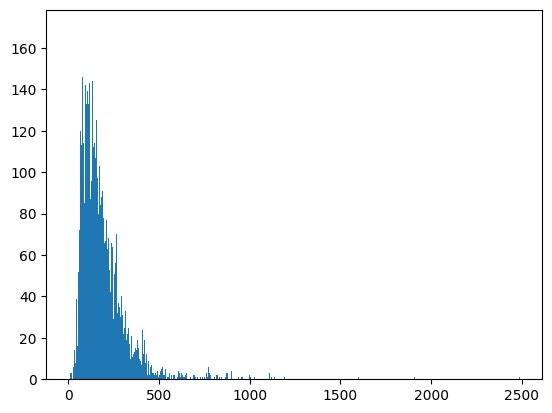

In [157]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [158]:
nos = np.array([len(x) for x in X])
len(nos[nos>700])

73

In [159]:
maxlen = 600
X = pad_sequences(X, maxlen=maxlen)

In [160]:
len(X[100])

600

In [161]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [162]:
print(vocab)

{'এক': 1, 'হয়েছে': 2, 'কথা': 3, 'হয়ে': 4, 'যায়': 5, 'দিয়ে': 6, 'সময়': 7, 'সাথে': 8, 'বাংলাদেশ': 9, 'জানান': 10, 'বিএনপি': 11, 'পুলিশ': 12, 'আমীর': 13, 'নাম': 14, 'টাকা': 15, 'বাংলাদেশের': 16, 'দেশের': 17, 'হিসেবে': 18, 'ইসলাম': 19, 'একটা': 20, 'বড়': 21, 'সেপ্টেম্বর': 22, 'রহমান': 23, 'জাতীয়': 24, 'বৃহত্তর': 25, 'সংবাদ': 26, 'শেখ': 27, 'রয়েছে': 28, 'শেষ': 29, 'শাখার': 30, 'গত': 31, 'হোসেন': 32, 'সরকার': 33, 'বছর': 34, 'ি': 35, 'প্রকাশ': 36, 'ঢাকা': 37, 'একজন': 38, 'দল': 39, 'দলের': 40, 'আওয়ামী': 41, 'দেশে': 42, 'প্রধান': 43, 'ভালো': 44, 'প্রধানমন্ত্রী': 45, 'ভাই': 46, 'খালেদা': 47, 'বিরুদ্ধে': 48, 'নামে': 49, 'সরকারের': 50, 'হাতে': 51, 'সম্পাদক': 52, 'তিন': 53, 'কারণে': 54, 'সম্মেলনে': 55, 'এসব': 56, 'সাবেক': 57, 'নেতা': 58, 'অভিযোগ': 59, 'খবর': 60, 'মানুষ': 61, 'সভাপতি': 62, 'ছবি': 63, 'দাবি': 64, 'ইসলামীর': 65, 'পাওয়া': 66, 'পড়ে': 67, 'খান': 68, 'সংগে': 69, 'কুন': 70, 'লীগের': 71, 'ভারতের': 72, 'দেয়া': 73, 'তথ্য': 74, 'মানুষের': 75, 'হওয়ার': 76, 'আরো': 77, 'মন্ত্রী': 78, 'সালে': 79, '

In [163]:
def get_weight_matrix (model):    
    weight_matrix = np.zeros ((vocab_size, 100))

    for word, i in vocab.items():
        if word == 'beatsসম্প্রতি' or 'beatsআজ':
            continue
        weight_matrix[i] = model.wv[word]
        # print(weight_matrix)
    return weight_matrix

In [164]:
# embedding_vectors = get_weight_matrix(glove_path)

In [165]:
embedding_vectors = get_weight_matrix(model)  #bn_w2v_model provides best accuracy 93%

In [166]:
embedding_vectors.shape

(82297, 100)

In [167]:
model = Sequential()
model.add (Embedding (vocab_size, output_dim=100, weights = [embedding_vectors], input_length=maxlen, trainable=True))
model.add(LSTM(units=128) )
model. add (Dense (1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [168]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 100)          8229700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 8,347,077
Trainable params: 8,347,077
Non-trainable params: 0
_________________________________________________________________


In [169]:
X.shape

(6707, 600)

In [170]:
y.shape

(6707,)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [172]:
model.fit(X_train, y_train, validation_split=0.2, epochs=3)

Train on 4292 samples, validate on 1073 samples
Epoch 1/3
4292/4292 [==============================] - ETA: 0s - loss: 0.3889 - accuracy: 0.8334

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


4292/4292 [==============================] - 114s 26ms/sample - loss: 0.3889 - accuracy: 0.8334 - val_loss: 0.2581 - val_accuracy: 0.9077
Epoch 2/3
4292/4292 [==============================] - 110s 26ms/sample - loss: 0.1037 - accuracy: 0.9681 - val_loss: 0.2538 - val_accuracy: 0.9012
Epoch 3/3
4292/4292 [==============================] - 109s 25ms/sample - loss: 0.0491 - accuracy: 0.9870 - val_loss: 0.2816 - val_accuracy: 0.9152


In [173]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

/usr/local/lib/python3.9/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [174]:
accuracy_score(y_test, y_pred)

0.9098360655737705

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       809
           1       0.91      0.86      0.88       533

    accuracy                           0.91      1342
   macro avg       0.91      0.90      0.91      1342
weighted avg       0.91      0.91      0.91      1342



In [176]:
# sample text to check if fake or not
x = ['শিক্ষা জীবনের সবচেয়ে গুরুত্বপূর্ণ ধাপ হল বিশ্ববিদ্যালয় জীবন। একজন শিক্ষার্থী নেতা হবে নাকি চোর হবে নাকি টপ রেপার হবে তা বিশ্ববিদ্যালয়ের প্রথম ছয় মাসেই বোঝা যায়। তাই প্রথম ছয় মাস খুব সাবধানতা অবলম্বন করতে হবে।বিশ্ববিদ্যালয়ে ভন্ডামি, লুচ্চামি, জাউড়ামি বেশি করে সাধারনতঃ যেসব ছেলে বা মেয়ে সিংগেল থাকে তারা। তারা আরেকজনের বফ বা গফ নিয়ে বেশি মাতামাতি করে। আর এর ফলে বিশ্ববিদ্যালয়ের পরিবেশ নষ্ট হয়ে যায় বলে অভিজ্ঞরা জানিয়েছেন। অনেকেই নিজেকে সিঙ্গেল বলে দাবী করলেও এরা আসলে প্লেবয় বা প্লেগার্ল। এরা পরিবেশের জন্য অত্যন্ত ক্ষতিকর। এই সমস্যা নিরসনে শিক্ষামন্ত্রী বলেছেন, যেসকল শিক্ষার্থী ভার্সিটি ভর্তির ছয় মাসেও নিজেকে সিঙ্গেল বলে দাবী করবে বা সিঙ্গেল থাকবে তাদের ভার্সিটি ভর্তি বাতিল করা হবে।']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
y = (model.predict(x) >= 0.5).astype(int)
print(y[0][0])
if y[0][0] == 1:
    print("TRUE")
else:
    print("FALSE")
a = model.predict(x)
print(f'Chance of being true news {a[0][0]} %')

0
FALSE
Chance of being true news 0.0019432627595961094 %


In [177]:
x = ["'ডিম আগে নাকি মুরগি আগে?' এই প্রশ্নটা সেই প্রস্তর যুগ থেকেই মানুষ করে আসছে। যেন সেই প্রশ্নের উত্তর দিতেই এবার মুরগির দুধ বাজারে আনলো আড়ং। পাস্তুরিত এই মুরগির দুধ প্যাকেটজাত করে বাজারে ছেড়েছে তারা। আমাদের eআরকি টিম তৎক্ষণাৎ চলে যায় আড়ং এর মিল্ক-ম্যানেজারের কাছে। তিনি আমাদের মুরগির দুধের চা দিয়ে আপ্যায়ন করেন। মুরগির দুধ কিভাবে সম্ভব, এমন প্রশ্নে আড়ং এর মিল্ক-ম্যানেজার অবাক হয়ে বলেন, 'ইয়াং ম্যান! বাংলাদেশে টাকা দিলে বাঘের দুধও ম্যানেজ করা সম্ভব, আর এটা তো মুরগির দুধ! বি রিয়েলিস্টিক। চা কেমন হয়েছে তাই বলো।' আমরা 'ভালো হয়েছে' বললে তিনি তার পিয়নকে মুরগির দুধের মিল্ক শেক আনতে বলেন। কিন্তু স্যার মুরগি তো স্তন্যপায়ী প্রাণী নয়, এমন পয়েন্টে মিল্ক-ম্যানেজার মুচকি হেসে বলেন, 'কিন্তু মানুষ তো দুধ পান করে। আমরা তো মুরগির জন্য দুধ বাজারে আনিনি। এনেছি মানুষের জন্য। সো, মুরগি দুধ খায় কিনা সেটা কেন ভাবছো?' এরপর তিনি আমাদের দেখান যে 'গিনেজ বুক' থেকে তাকে নক দেয়া হয়েছে। তিনি আরো জানান, 'এনিমেল প্লানেট' চ্যানেল থেকে মুরগির দুধ বিষয়ক একটি ডকুমেন্টারি বানানোর জন্য টিম পাঠানো হচ্ছে বাংলাদেশে। সব শেষে তিনি আমাদের মুরগির দুধের পুডিং খেতে দেন। এদিকে ক্রেতাসাধারণ এই মুরগির দুধকে প্রতারণা হিসেবে দেখছে। একটি ফুড ব্লগারস গ্রুপে এই দুধের প্যাকেটের ছবি পোস্ট করা হলে সেখানে ক্ষোভে ফেটে পড়ে গ্রুপের অন্যান্য মেম্বাররা। জনৈক মেম্বার বলেন, 'ইহা রীতিমত প্রতারণা। আমরা ইহার দৃষ্টান্তমূলক শাস্তি দাবী করি।' অন্য একজন ক্রেতা কমেন্টে বলেন, 'ব্র‍্যাক তুমি কিসের দুধ খাওয়াচ্ছো, জাতি জানতে চায়।' অবশ্য ভিন্নমতও পাওয়া গেছে। জনৈক ভোক্তা বলেন, 'এজন্যই ধানমন্ডি লেকের চা অনেক মজা। ওরাও নাকি মুরগির দুধ দিয়ে চা বানায়।"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
y = (model.predict(x) >= 0.5).astype(int)
print(y[0][0])
if y[0][0] == 1:
    print("TRUE")
else:
    print("FALSE")
a = model.predict(x)
print(f'Chance of being true news {a[0][0]} %')

0
FALSE
Chance of being true news 0.006282392889261246 %


In [187]:
#https://www.prothomalo.com/bangladesh/wz6fktgwti

x = ["যুক্তরাজ্যভিত্তিক আন্তর্জাতিক মানবাধিকার সংস্থা অ্যামনেস্টি ইন্টারন্যাশনাল বলেছে, বাংলাদেশের সর্ববৃহৎ দৈনিক সংবাদপত্র প্রথম আলো আক্রমণের লক্ষ্যবস্তু হয়েছে। দেশটিতে গণমাধ্যমের ওপর বাড়তে থাকা আক্রমণের সর্বশেষ ঘটনা এটি। সেখানে গণমাধ্যমকে ভয় দেখানো, হয়রানি ও সাংবাদিকদের গ্রেপ্তারের মতো বিষয়গুলো রয়েছে। প্রথম আলোর ওপর এই আক্রমণ বাংলাদেশে গণমাধ্যমের স্বাধীনতার সংকট গভীর হওয়ার ইঙ্গিত দিচ্ছে। আজ বুধবার অ্যামনেস্টি ইন্টারন্যাশনালের ওয়েবসাইটে এক প্রতিবেদনে এ কথা বলা হয়েছে। অ্যামনেস্টি বলেছে, বাংলাদেশের প্রধানমন্ত্রী শেখ হাসিনা সোমবার জাতীয় সংসদে ভাষণে প্রথম আলোকে ‘আওয়ামী লীগের শত্রু, গণতন্ত্রের শত্রু এবং দেশের মানুষের শত্রু’ বলেছেন। তিনি এ কথা বলেছেন স্বাধীনতা দিবসে জীবনযাত্রার ব্যয় নিয়ে প্রকাশিত একটি প্রতিবেদনের সূত্র ধরে। ওই প্রতিবেদনের প্রতিবেদক শামসুজ্জামানকে আটক করে তাঁর বিরুদ্ধে দেশের কঠোরতম আইন ডিজিটাল নিরাপত্তা আইনে (ডিএসএ) মামলা দেওয়া হয়। পরে তিনি জামিনে মুক্ত হন। প্রথম আলোর সম্পাদক মতিউর রহমানের বিরুদ্ধেও ডিজিটাল নিরাপত্তা আইনে মামলা দেওয়া হয়েছে। শামসুজ্জামানের বিরুদ্ধে যে দুটি মামলা হয়েছে, তার একটিতে প্রথম আলো সম্পাদককে প্রধান আসামি করা হয়েছে।   জাতীয় সংসদে প্রধানমন্ত্রীর বক্তব্যের কয়েক ঘণ্টা পর একদল ব্যক্তি রাজধানী ঢাকায় প্রথম আলোর কার্যালয়ে জোর করে ঢুকে পড়েন। তাঁরা হুমকি দেওয়ার পাশাপাশি প্রথম আলোর লোগোর ওপরে ‘বর্জন কর’ (বয়কট) লিখে দেন।"]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
y = (model.predict(x) >= 0.5).astype(int)
print(y[0][0])
if y[0][0] == 1:
    print("TRUE")
else:
    print("FALSE")
a = model.predict(x)
validity = round(a[0][0] * 100, 4)
print('Chance of being true news', validity, '%')

1
TRUE
Chance of being true news 93.4943 %
